# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import userinput
from thermo import Chemical
import os

plotwidth = (6.3, 4)
fontsize_min = 18
fontsize_maj = 25


In [2]:
#Properties of hot water
chemical = Chemical('water', T=(userinput.t_ATES_service + 273.15))
water_density = chemical.rho  # kg/m^3
specific_heat_capacity = chemical.Cpl  # J/(kg·K)
kinematic_viscosity = chemical.nu  # m^2/s
thermal_conductivity_water = chemical.kl  # Thermal conductivity of liquid phase (W/m·K) 0.6425006607115105

# Temperature, demand and electricity price

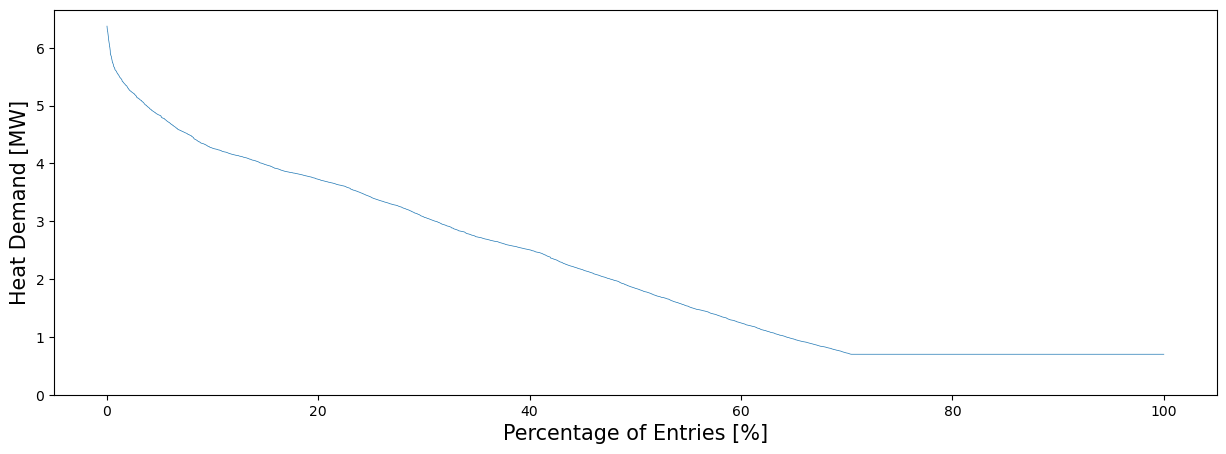

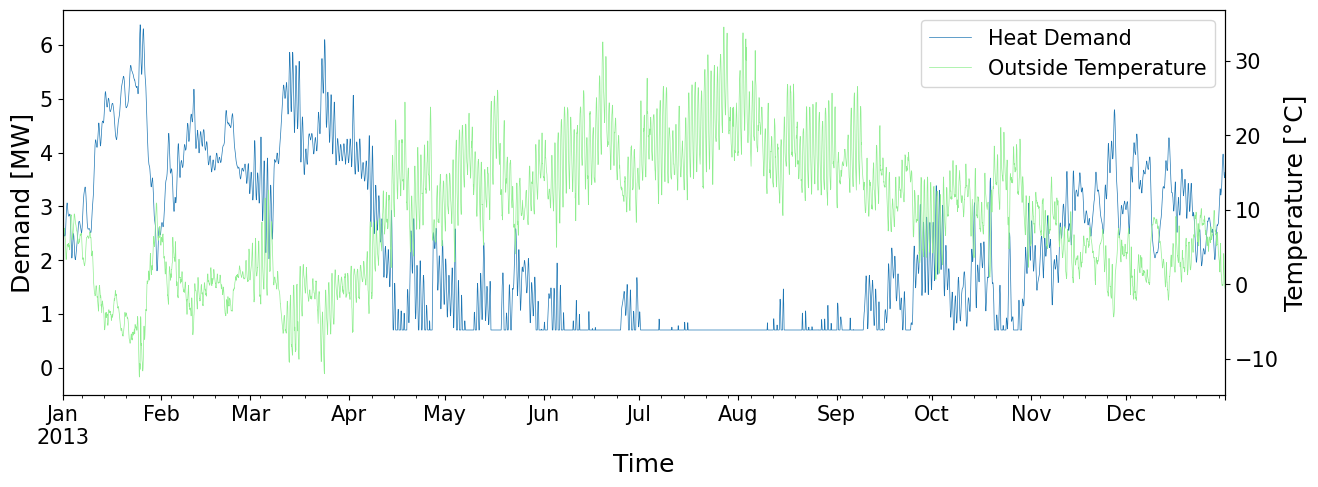

In [3]:
from functions import temperature_and_electricity_price
time_index_H, temperature_heat, heat_demand, cooling_demand, electricity_price, electricity_price_raw, COP_hp, temperature = temperature_and_electricity_price()

df_temp_time = pd.DataFrame({
    'time': time_index_H,
    'temperature_heat': temperature_heat.values,
    'heat_demand': heat_demand.values,
    'COP_hp': COP_hp.values,
    'electricity_price': electricity_price.values,
    'electricity_price_raw': electricity_price_raw.values,
    'outside_temperature': temperature.values
})

# if userinput.LT_ATES:
#     df_temp_time.to_csv('csv_and_xlsx/LT_Analysis_I_temp_time.csv', index='time')
# else:
df_temp_time.to_csv('csv_and_xlsx/Analysis_I_temp_time.csv', index='time')

# ATES Setup

Ground Analysis Berlin

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Index(['Layer', 'Top Elevation (m)', 'Thickness (m)', 'Base Elevation (m)',
       'th. conductivity (W/(m·K))', 'vol. heatcap. of solid(MJ/(m³·K))',
       'porosity -', 'hydr. conductivity (m/s)', 'x_coords'],
      dtype='object')


Layer                    Holocene  Saalian Holstein Elsterian  Miocene   
Thickness (m)                 5.7     40.5      2.3      98.6     15.4  \
hydr. conductivity (m/s)  1.4e-05  4.4e-06  1.9e-08   9.0e-07  6.9e-07   
porosity -                   0.32    0.314    0.296     0.304    0.301   

Layer                     Cottbus Rupelian Pre-Rupelian Upper_Cretaceous   
Thickness (m)                 2.7     59.4         67.9             33.1  \
hydr. conductivity (m/s)  1.2e-06  3.2e-08      6.6e-07          4.8e-07   
porosity -                  0.305    0.237        0.297             0.11   

Layer                    Lower_Cretaceous Jurassic   Keuper Muschelkalk   
Thickness (m)                           0      201    489.7         284  \
hydr. conductivity (m/s)          4.8e-07  4.8e-07  9.6e-09     9.6e-09   
porosity -                           0.11    0.189    0.128        0.15   

Layer                    Muschelkalk Muschelkalk Upper_Buntsandstein   
Thickness (m)                    284         284                 192  \
hydr. conductivity (m/s)         NaN     5.8e-10             6.4e-09   
porosity -                     0.036        0.12               0.025   

Layer                    Middle_Buntsandstein Lower_Buntsandstein Zechstein   
Thickness (m)                           212.8               350.7    1152.4  \
hydr. conductivity (m/s)              5.8e-07             1.3e-09       NaN   
porosity -                              0.135               0.049     0.005   

Layer                    Rotliegend  
Thickness (m)                 101.5  
hydr. conductivity (m/s)    5.1e-08  
porosity -                    0.078

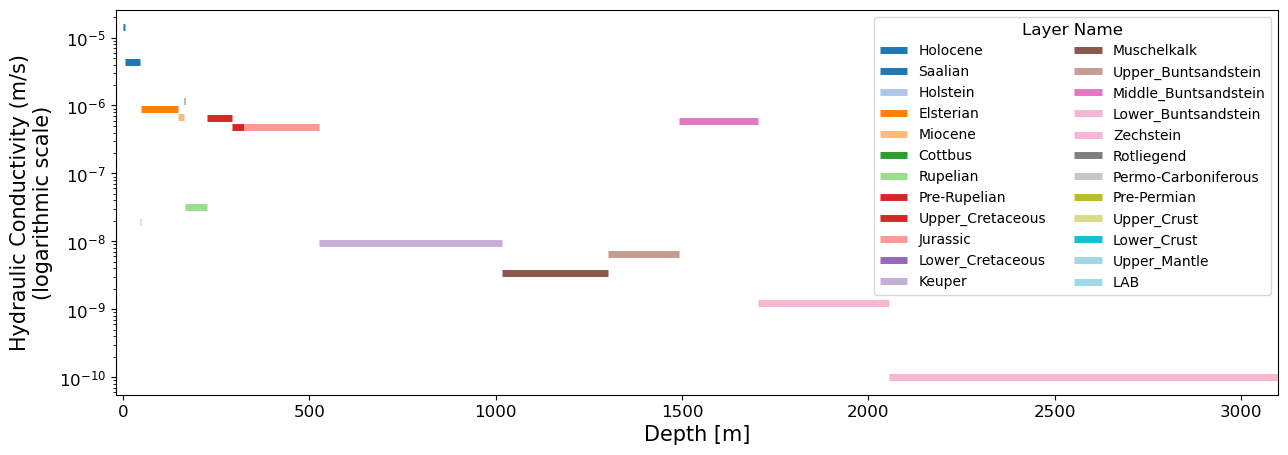

In [4]:
RUN_GEO = False  # Set to True to re-run and save, False to load from file. True is important for changing the location in the ground data.

from ATES_ground import ATES_ground_analysis
groundlayers, df_ground_display = ATES_ground_analysis(RUN_GEO)
print(groundlayers.columns)
df_ground_display[['Thickness (m)', 'hydr. conductivity (m/s)', 'porosity -']].head(20).T

# Visual Analysis: Element 8 "Pre-Rupelian", at 46m thickness and a hydraulic conductivity of 6,5 e-7 m/s seems to be adequate, as hydraulic conductivity of the upper layer (Rupelian) is just around 5% of HolstPre-Rupelian
# Still, Jurassic is chosen to match with Geospeicher, at a thickness of 30 metres
Alternativeley, Element 4 "Elsterian", at 100m thickness and a hydraulic conductivity of 9e-7 seems to be adequate Element 8 "Pre-Rupelian", at 46m thickness and a hydraulic conductivity of 6,5 e-7 m/s seems to be adequate as well, as hydraulic conductivity of the upper layer (Rupelian) is just around 5% of HolstPre-Rupelian, as hydraulic conductivity of Holstein and Rupelian are around 2 dimensions smaller. Miocene and Cottbus are neglected due to small Thickness.


In [5]:
chosen_layer = 9
print("Chosen layer: ", groundlayers['Layer'].iloc[chosen_layer])
depth_ATES = groundlayers['Thickness (m)'].iloc[:chosen_layer].sum() + groundlayers['Thickness (m)'].iloc[chosen_layer] / 2
porosity = groundlayers['porosity -'].iloc[chosen_layer]  # Porosity of the chosen layer
density_solid = 2100 # kg/m^3 #nachprüfen
heat_capacity_solid = groundlayers['vol. heatcap. of solid(MJ/(m³·K))'].iloc[chosen_layer]*1000000 / density_solid # J/(kg·K)
lambda_stand = (groundlayers['th. conductivity (W/(m·K))'].iloc[chosen_layer])

#Following two lines are commented out because they are not used in the rest of the code due to alternating assumptions
#layer_thickness = groundlayers['Thickness (m)'].iloc[chosen_layer]
layer_thickness = 30 # m

#hydr_cond = groundlayers['hydr. conductivity (m/s)'].iloc[chosen_layer]
from functions import calculate_ground_parameters



# Example usage:
permeability = userinput.perm_Darcy * 9.87e-13
temperature_depth, hydr_cond = calculate_ground_parameters(depth_ATES, permeability)  # permeability for reference system between 1.5 and 2.0 Darcy


Chosen layer:  Jurassic
hydr_cond:  1.72e-05 m/s


In [6]:
from functions import ATES_complete_setup
ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes = ATES_complete_setup(hydr_cond, layer_thickness, porosity, depth_ATES, temperature_depth, heat_capacity_solid, lambda_stand)

V_dot_max_ATES: 0.073 m3/s = 262.461 m3/h, ATES_max_power: 6.006 MW
r_hyd_max: 131.0 m, r_hyd_mid: 87.9 m, water_volume: 305901.6 m3
Pipe Requirements:
Number of wells per ATES : 1, volumeflow per pipe final: 0.0729m3s, Pipe diameter: 315 mm, Pressure drop: 0.973 bar, Velocity: 0.936 m/s, alpha_in: 19619.8 W/m2K
System results:
dt:  0.001  K, Q_loss_pipes:  150.166  W, phi:  0.999975
ATES geometry:
Radii: r_hyd: 131.0 m, r_th: 90.5 m, r_hyd_mid: 87.9 m, water_volume per storage: 1618527.0 m3, surface medium velocity: 4.4e-06 m/s
Q loss ATES:
lambda_transmission: 2.71, lambda_convection: 25.98, added faktorterm: 18670.143585029684
Q ATES standing: 0.1 MW, Q loss charge: 0.5 MW
phi_standing: 0.99998394, dp_ATES: 5.0 bar, phi_charge_ATES: 0.92527591
power of pump: 0.051 MW


In [7]:
phi_charge_ATES * phi_pipes

0.9252527785929362

# Model Setup

In [8]:
from IPython.display import clear_output
from functions import calculate_ground_parameters

df_results_I = pd.DataFrame(columns=[
    "hydr_cond", "permeability","layer_thickness", "depth_ATES", "porosity", "temperature_ground",
    "ATES_max_power", "phi_standing", "phi_charge_ATES", "phi_pipes", "phi_charge", "P_pump", "Q_ATES_standing_mean", "num_wells"
])

for d in depth_ATES * np.array(userinput.d_analysis_factor):
    for perm in permeability * np.array(userinput.perm_analysis_factor): 
        for lt in layer_thickness * np.array(userinput.lt_analysis_factor):
            for p in porosity * np.array(userinput.p_analysis_factor):

                temperature_ground, hydr_cond = calculate_ground_parameters(d, perm)
                ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes = ATES_complete_setup(
                    hydr_cond, lt, p, d, temperature_ground, heat_capacity_solid, lambda_stand
                )
                # Append new row to DataFrame
                df_results_I.loc[len(df_results_I)] = [
                    hydr_cond, perm, lt, d, p, temperature_ground, ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, phi_charge_ATES * phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes
                ]
clear_output()

# if userinput.LT_ATES:
#     df_results_I.to_csv("csv_and_xlsx/LT_ATES_sensitivity_results_I.csv", index=False)
# else:
df_results_I.to_csv("csv_and_xlsx/ATES_sensitivity_results_I.csv", index=False)

In [9]:
#second runn for plot
from IPython.display import clear_output
from functions import calculate_ground_parameters

df_results_I_plot = pd.DataFrame(columns=[
    "hydr_cond", "permeability","layer_thickness", "depth_ATES", "porosity", "temperature_ground",
    "ATES_max_power", "phi_standing", "phi_charge_ATES", "phi_pipes", "phi_charge", "P_pump", "Q_ATES_standing_mean", "num_wells_pipes"
])

for d in depth_ATES * np.array(sorted(userinput.d_analysis_factor)):
    for perm in permeability * np.array(sorted(userinput.perm_analysis_factor)): 
        for lt in layer_thickness * np.array(sorted(userinput.lt_analysis_factor)):
            for p in porosity * np.array(sorted(userinput.p_analysis_factor)):

                temperature_ground, hydr_cond = calculate_ground_parameters(d, perm)
                ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes = ATES_complete_setup(
                    hydr_cond, lt, p, d, temperature_ground, heat_capacity_solid, lambda_stand
                )
                # Append new row to DataFrame
                df_results_I_plot.loc[len(df_results_I_plot)] = [
                    hydr_cond, perm, lt, d, p, temperature_ground, ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, phi_charge_ATES * phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes
                ]

# clear_output()

hydr_cond:  9.81e-06 m/s
V_dot_max_ATES: 0.021 m3/s = 74.801 m3/h, ATES_max_power: 1.712 MW
r_hyd_max: 191.2 m, r_hyd_mid: 128.2 m, water_volume: 305901.6 m3
Pipe Requirements:
Number of wells per ATES : 1, volumeflow per pipe final: 0.0208m3s, Pipe diameter: 200 mm, Pressure drop: 0.779 bar, Velocity: 0.661 m/s, alpha_in: 33676.4 W/m2K
System results:
dt:  0.002  K, Q_loss_pipes:  149.857  W, phi:  0.999912
ATES geometry:
Radii: r_hyd: 191.2 m, r_th: 129.3 m, r_hyd_mid: 128.2 m, water_volume per storage: 1721837.2 m3, surface medium velocity: 1.72e-06 m/s
Q loss ATES:
lambda_transmission: 2.71, lambda_convection: 11.99, added faktorterm: 8852.901496611477
Q ATES standing: 0.0 MW, Q loss charge: 0.1 MW
phi_standing: 0.99999238, dp_ATES: 5.0 bar, phi_charge_ATES: 0.94162553
power of pump: 0.014 MW
hydr_cond:  9.81e-06 m/s
V_dot_max_ATES: 0.021 m3/s = 74.801 m3/h, ATES_max_power: 1.712 MW
r_hyd_max: 188.2 m, r_hyd_mid: 126.2 m, water_volume: 305901.6 m3
Pipe Requirements:
Number of wells

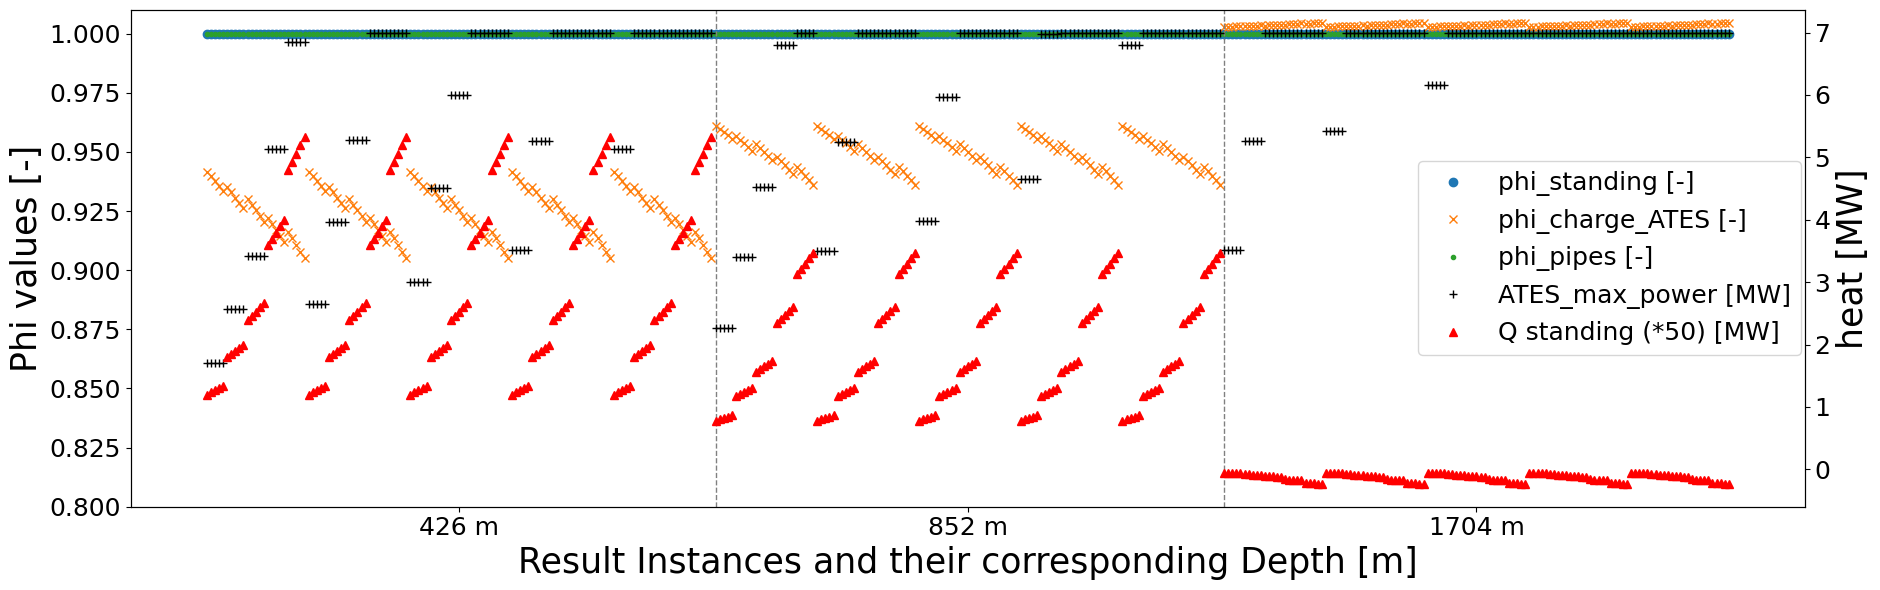

In [10]:
fig, ax1 = plt.subplots(figsize=(3*plotwidth[0], 1.5*plotwidth[1]))

# Plot phi_standing, phi_charge_ATES, phi_pipes on left y-axis
ax1.plot(df_results_I_plot['phi_standing'], label='phi_standing [-]', linestyle='', marker='o')
ax1.plot(df_results_I_plot['phi_charge_ATES'], label='phi_charge_ATES [-]', linestyle='', marker='x')
ax1.plot(df_results_I_plot['phi_pipes'], label='phi_pipes [-]', linestyle='', marker='.')
ax1.set_ylabel('Phi values [-]', fontsize=fontsize_maj)
ax1.set_xlabel('Result Instances and their corresponding Depth [m]', fontsize=fontsize_maj)

ax1.set_ylim(0.8, 1.01)
ax1.legend(loc='center right', fontsize=fontsize_min)

# Plot ATES_max_power on right y-axis
ax2 = ax1.twinx()
ax2.plot(df_results_I_plot['ATES_max_power'], color='black', label='ATES_max_power [MW]', linestyle='', marker='+')
ax2.plot(df_results_I_plot['Q_ATES_standing_mean']*50, color='red', label='Q standing (*50) [MW]', linestyle='', marker='^')

ax2.set_ylabel('heat [MW]', color='black', fontsize=fontsize_maj)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(loc='upper right')
# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right', fontsize=fontsize_min, bbox_to_anchor=(1.005, 0.5))
os.makedirs('RESULTS_PDFs', exist_ok=True)

# Set x-ticks at the boundaries where 'depth_ATES' changes
depths = df_results_I_plot['depth_ATES'].unique()
depth_indices = [df_results_I_plot[df_results_I_plot['depth_ATES'] == d].index[0] for d in depths]
depth_indices.append(len(df_results_I_plot))  # Add end for last block

# Set the x-ticks at the middle of each block for labeling
mid_indices = [(depth_indices[i] + depth_indices[i+1] - 1) // 2 for i in range(len(depths))]
ax1.set_xticks(mid_indices)
ax1.set_xticklabels([f"{d:.0f} m" for d in depths], fontsize=fontsize_min)
ax1.tick_params(axis='y', labelsize=fontsize_min)
ax2.tick_params(axis='y', labelsize=fontsize_min)


# Add vertical lines to indicate boundaries between depths
for idx in depth_indices[1:-1]:
    ax1.axvline(x=idx, color='gray', linestyle='--', linewidth=1)


plt.tight_layout()
plt.savefig(os.path.join('RESULTS_PDFs', 'phi_values_characteristics_variation.pdf'), format='pdf')
plt.show()

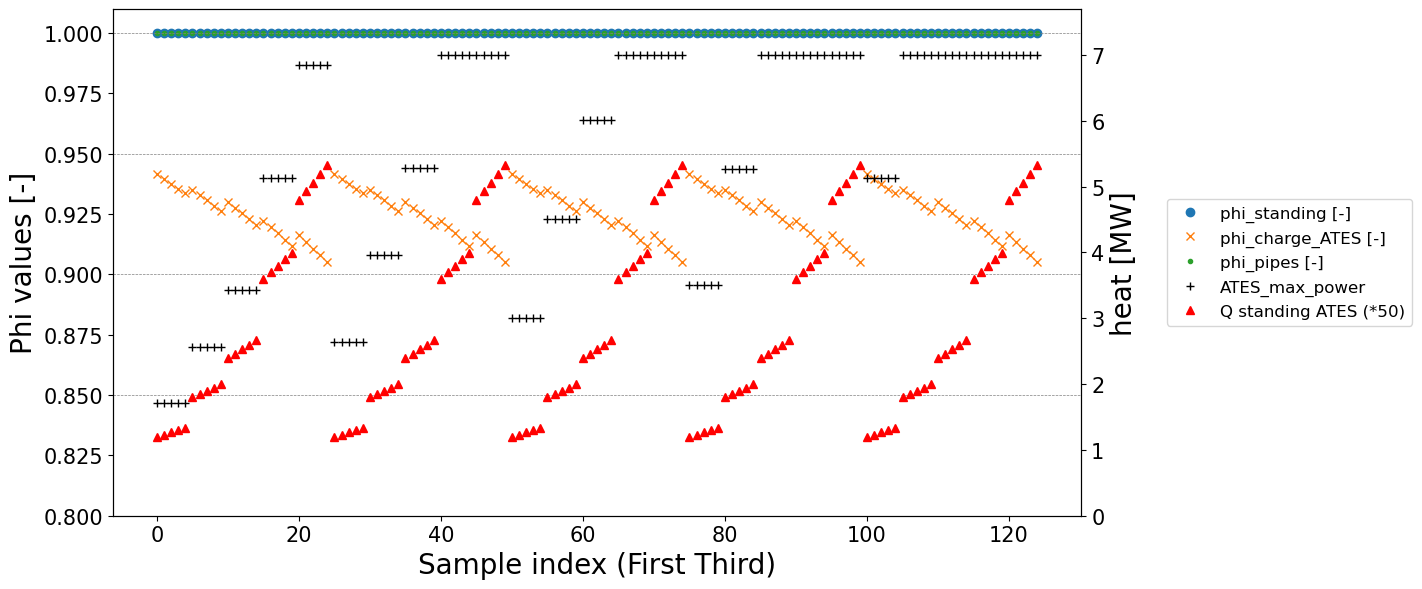

In [11]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Filter the first third of the data
first_third = df_results_I_plot.iloc[:len(df_results_I_plot) // 3]

# Plot phi_standing, phi_charge_ATES, phi_pipes on left y-axis
ax1.plot(first_third['phi_standing'], label='phi_standing [-]', linestyle='', marker='o')
ax1.plot(first_third['phi_charge_ATES'], label='phi_charge_ATES [-]', linestyle='', marker='x')
ax1.plot(first_third['phi_pipes'], label='phi_pipes [-]', linestyle='', marker='.')
#ax1.legend(loc='upper left')
# Add slim horizontal lines for every step of 0.05
for y in np.arange(0.8, max(first_third['phi_standing'].max(), first_third['phi_charge_ATES'].max(), first_third['phi_pipes'].max()) + 0.01, 0.05):
    ax1.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
# Plot ATES_max_power on right y-axis
ax2 = ax1.twinx()
ax2.plot(first_third['ATES_max_power'], color='black', label='ATES_max_power', linestyle='', marker='+')
ax2.plot(first_third['Q_ATES_standing_mean']*50, color='red', label='Q standing ATES (*50)', linestyle='', marker='^')

#ax1.set_xlim(-2, len(first_third)*1.2)
ax2.set_ylim(0, max(first_third['ATES_max_power'].max(), first_third['Q_ATES_standing_mean'].max()*50)*1.1)
ax1.set_ylim(0.8, 1.01)
ax1.set_ylabel('Phi values [-]', fontsize=20)
ax1.set_xlabel('Sample index (First Third)', fontsize=20)
ax2.set_ylabel('heat [MW]', color='black', fontsize=20)
# tick_params does not accept 'fontsize' — use 'labelsize' instead
ax1.tick_params(axis='x', labelcolor='black', labelsize=15)
ax1.tick_params(axis='y', labelcolor='black', labelsize=15)
ax2.tick_params(axis='y', labelcolor='black', labelsize=15)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right', fontsize=12, bbox_to_anchor=(1.35, 0.5))

plt.tight_layout()
plt.savefig('RESULTS_PDFs/phi_values_characteristics_variation_first_third.pdf', format='pdf')
plt.show()

In [12]:
fq = first_third.copy()
fq.sort_values(by='phi_charge', inplace=True)
top_vals = fq[['phi_charge', 'depth_ATES', 'hydr_cond', 'layer_thickness', 'porosity', 'phi_standing']].reset_index(drop=True).iloc[:11]
bottom_vals = fq[['phi_charge', 'depth_ATES', 'hydr_cond', 'layer_thickness', 'porosity', 'phi_standing']].reset_index(drop=True).iloc[-11:]

rounding_values = {
    "$\phi_{c}$": 7,
    "$depth$": 2,
    "hyd cond": 6,
    "thickness": 1,
    "porosity": 3,
    "phi_standing": 10
}

rename_map = {
    "phi_charge": "$\phi_{c}$",
    "depth_ATES": "$depth$",
    "hydr_cond": "hyd cond",
    "layer_thickness": "thickness",
    "porosity": "porosity",
    "phi_standing": "$\phi_{s}$"
}

top_vals.rename(columns=rename_map, inplace=True)
bottom_vals.sort_values(by='phi_charge', inplace=True, ascending=True)
bottom_vals.rename(columns=rename_map, inplace=True)


top_vals = top_vals.round(rounding_values)
bottom_vals = bottom_vals.round(rounding_values)

min_table = pd.concat(
    [
        pd.DataFrame({"Index": range(1, 12)}),
        pd.DataFrame(bottom_vals.reset_index(drop=True))
    ],
    axis=1
)

max_table = pd.concat(
    [
        pd.DataFrame({"Index": range(1, 12)}),
        pd.DataFrame(top_vals.reset_index(drop=True))
    ],
    axis=1
)

def make_formatter(decimals: int):
    fmt = "{:." + str(decimals) + "f}"
    return lambda x: fmt.format(x) if pd.notnull(x) else ""

# Build formatters for max_table and min_table
formatters_max = {}
formatters_min = {}
for col in max_table.columns:
    if col == "Index":
        continue
    if col in rounding_values:
        formatters_max[col] = make_formatter(rounding_values[col])
for col in min_table.columns:
    if col == "Index":
        continue
    if col in rounding_values:
        formatters_min[col] = make_formatter(rounding_values[col])

# Generate LaTeX
latex_max = max_table.to_latex(
    index=False,
    escape=False,
    formatters=formatters_max,
    na_rep=""
)
print(latex_max)

latex_min = min_table.to_latex(
    index=False,
    escape=False,
    formatters=formatters_min,
    na_rep=""
)



\begin{tabular}{rrrrrrr}
\toprule
Index & $\phi_{c}$ & $depth$ & hyd cond & thickness & porosity & $\phi_{s}$ \\
\midrule
1 & 0.9050077 & 426.11 & 0.000010 & 60.0 & 0.200 & 0.999966 \\
2 & 0.9050081 & 426.11 & 0.000029 & 60.0 & 0.200 & 0.999966 \\
3 & 0.9050081 & 426.11 & 0.000015 & 60.0 & 0.200 & 0.999966 \\
4 & 0.9050081 & 426.11 & 0.000017 & 60.0 & 0.200 & 0.999966 \\
5 & 0.9050081 & 426.11 & 0.000020 & 60.0 & 0.200 & 0.999966 \\
6 & 0.9078580 & 426.11 & 0.000010 & 60.0 & 0.195 & 0.999967 \\
7 & 0.9078584 & 426.11 & 0.000017 & 60.0 & 0.195 & 0.999967 \\
8 & 0.9078584 & 426.11 & 0.000015 & 60.0 & 0.195 & 0.999967 \\
9 & 0.9078584 & 426.11 & 0.000020 & 60.0 & 0.195 & 0.999967 \\
10 & 0.9078584 & 426.11 & 0.000029 & 60.0 & 0.195 & 0.999967 \\
11 & 0.9106797 & 426.11 & 0.000010 & 60.0 & 0.189 & 0.999968 \\
\bottomrule
\end{tabular}



In [13]:
print(latex_min)

\begin{tabular}{rrrrrrr}
\toprule
Index & $\phi_{c}$ & $depth$ & hyd cond & thickness & porosity & $\phi_{s}$ \\
\midrule
1 & 0.9376084 & 426.11 & 0.000029 & 15.0 & 0.189 & 0.999992 \\
2 & 0.9395603 & 426.11 & 0.000010 & 15.0 & 0.183 & 0.999992 \\
3 & 0.9395891 & 426.11 & 0.000015 & 15.0 & 0.183 & 0.999992 \\
4 & 0.9395956 & 426.11 & 0.000017 & 15.0 & 0.183 & 0.999992 \\
5 & 0.9396023 & 426.11 & 0.000020 & 15.0 & 0.183 & 0.999992 \\
6 & 0.9396151 & 426.11 & 0.000029 & 15.0 & 0.183 & 0.999992 \\
7 & 0.9415431 & 426.11 & 0.000010 & 15.0 & 0.178 & 0.999992 \\
8 & 0.9415720 & 426.11 & 0.000015 & 15.0 & 0.178 & 0.999992 \\
9 & 0.9415785 & 426.11 & 0.000017 & 15.0 & 0.178 & 0.999992 \\
10 & 0.9415853 & 426.11 & 0.000020 & 15.0 & 0.178 & 0.999992 \\
11 & 0.9415980 & 426.11 & 0.000029 & 15.0 & 0.178 & 0.999992 \\
\bottomrule
\end{tabular}



In [14]:
df_fq = first_third.copy()
df_fq['phi_charge'] = df_fq['phi_charge_ATES'] * df_fq['phi_pipes']
df_fq['phi_total'] = df_fq['phi_charge'] * df_fq['phi_standing']

df_fq.sort_values(by='phi_total', inplace=True)
df_fq.reset_index(drop=True, inplace=True)


In [15]:
permeability

1.72725e-12

hydr_cond:  1.72e-05 m/s
V_dot_max_ATES: 0.073 m3/s = 262.461 m3/h, ATES_max_power: 6.006 MW
r_hyd_max: 131.0 m, r_hyd_mid: 87.9 m, water_volume: 305901.6 m3
Pipe Requirements:
Number of wells per ATES : 1, volumeflow per pipe final: 0.0729m3s, Pipe diameter: 315 mm, Pressure drop: 0.973 bar, Velocity: 0.936 m/s, alpha_in: 19619.8 W/m2K
System results:
dt:  0.001  K, Q_loss_pipes:  150.166  W, phi:  0.999975
ATES geometry:
Radii: r_hyd: 131.0 m, r_th: 90.5 m, r_hyd_mid: 87.9 m, water_volume per storage: 1618527.0 m3, surface medium velocity: 4.4e-06 m/s
Q loss ATES:
lambda_transmission: 2.71, lambda_convection: 25.98, added faktorterm: 18670.143585029684
Q ATES standing: 0.1 MW, Q loss charge: 0.5 MW
phi_standing: 0.99998394, dp_ATES: 5.0 bar, phi_charge_ATES: 0.92527591
power of pump: 0.051 MW


Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 54.32it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-31


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-xcn70zfo.lp
Reading time = 0.88 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x781d110d
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [9e-01, 7e+04]
  Bounds range     [5e+01, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 35041 rows and 8764 columns
Presolve time: 0.58s
Presolved: 96357 rows, 87602 columns, 271551 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.08s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 2.803e+05
 Factor NZ  : 1.371e+06 (roughly 90 MB of memory)


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 3.7 MW,
 ATES_capacity: 769.58 MWh, ATES_power: 0.81 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 0.73 MW,
 capacity_TTES: 60.85


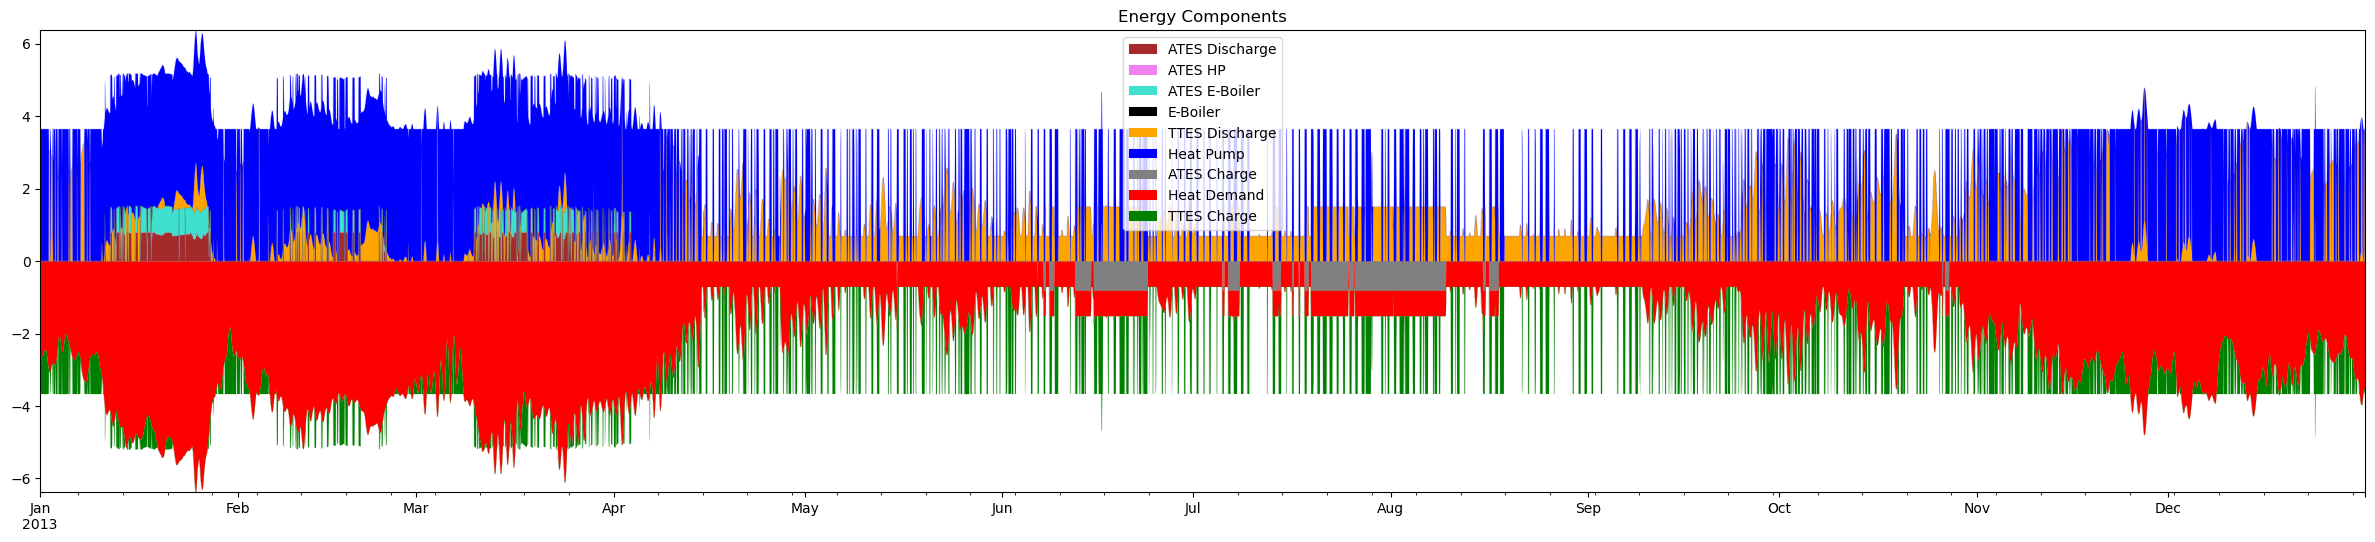

In [16]:
from ATES_optimization import optimization, plot_results

temperature_ground_test, hydr_cond_test = calculate_ground_parameters(depth_ATES, permeability)



ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes = ATES_complete_setup(hydr_cond_test, layer_thickness, porosity, depth_ATES, temperature_ground_test, heat_capacity_solid, lambda_stand)
m_regular, obj_sol_regular = optimization(depth_ATES, ATES_max_power, time_index_H, temperature_heat, phi_standing, phi_pipes * phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None, create_LATEX = True)
plot_results(m_regular, time_index_H, heat_demand, electricity_price)

In [17]:
import os
# if userinput.LT_ATES:
#     dir = "LT_optimization_1_basecase"
# else:
dir = "optimization_1_basecase"
os.makedirs(dir, exist_ok=True)

# flush existing files in the directory
for f in os.listdir(dir):
    file_path = os.path.join(dir, f)
    if os.path.isfile(file_path):
        os.remove(file_path)

m_solution = pd.DataFrame({k: v.values for k, v in m_regular.solution.data_vars.items()}, index=time_index_H)
m_dual = pd.DataFrame({k: v.values for k, v in m_regular.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': df_results_I['phi_charge'].iloc[0],
    'phi_standing': df_results_I['phi_standing'].iloc[0],
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  
# Add obj_sol_regular dictionary as new columns to system_info
for k, v in obj_sol_regular.items():
    system_info[k] = v

# Concatenate both DataFrames horizontally
df_result01 = pd.concat([heat_demand.rename('heat_demand'), m_solution, m_dual, system_info], axis=1)
df_result01.reset_index(inplace=True)
df_result01.rename(columns={'index': 'datetime'}, inplace=True)

# Create filename with short variable names and values
filename = f"{dir}/01_ATES_default_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],0):.1f}_drc_{round(userinput.drilling_costs,0):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result01.to_csv(filename, index=False)



Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 29.00it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-vz5g92pw.lp
Reading time = 1.14 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x58bf6c54
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [9e-01, 7e+04]
  Bounds range     [5e+01, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 78843 rows and 35048 columns
Presolve time: 0.37s
Presolved: 52555 rows, 43799 columns, 131388 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.03s

Barrier statistics:
 Dense cols : 4
 AA' NZ     : 9.635e+04
 Factor NZ  : 6.569e+05 (roughly 40 MB of memory)

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.4 MW, capacity_hp: 4.4 MW,
 ATES_capacity: 0.0 MWh, ATES_power: 0.0 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 0.0 MW,
 capacity_TTES: 110.54


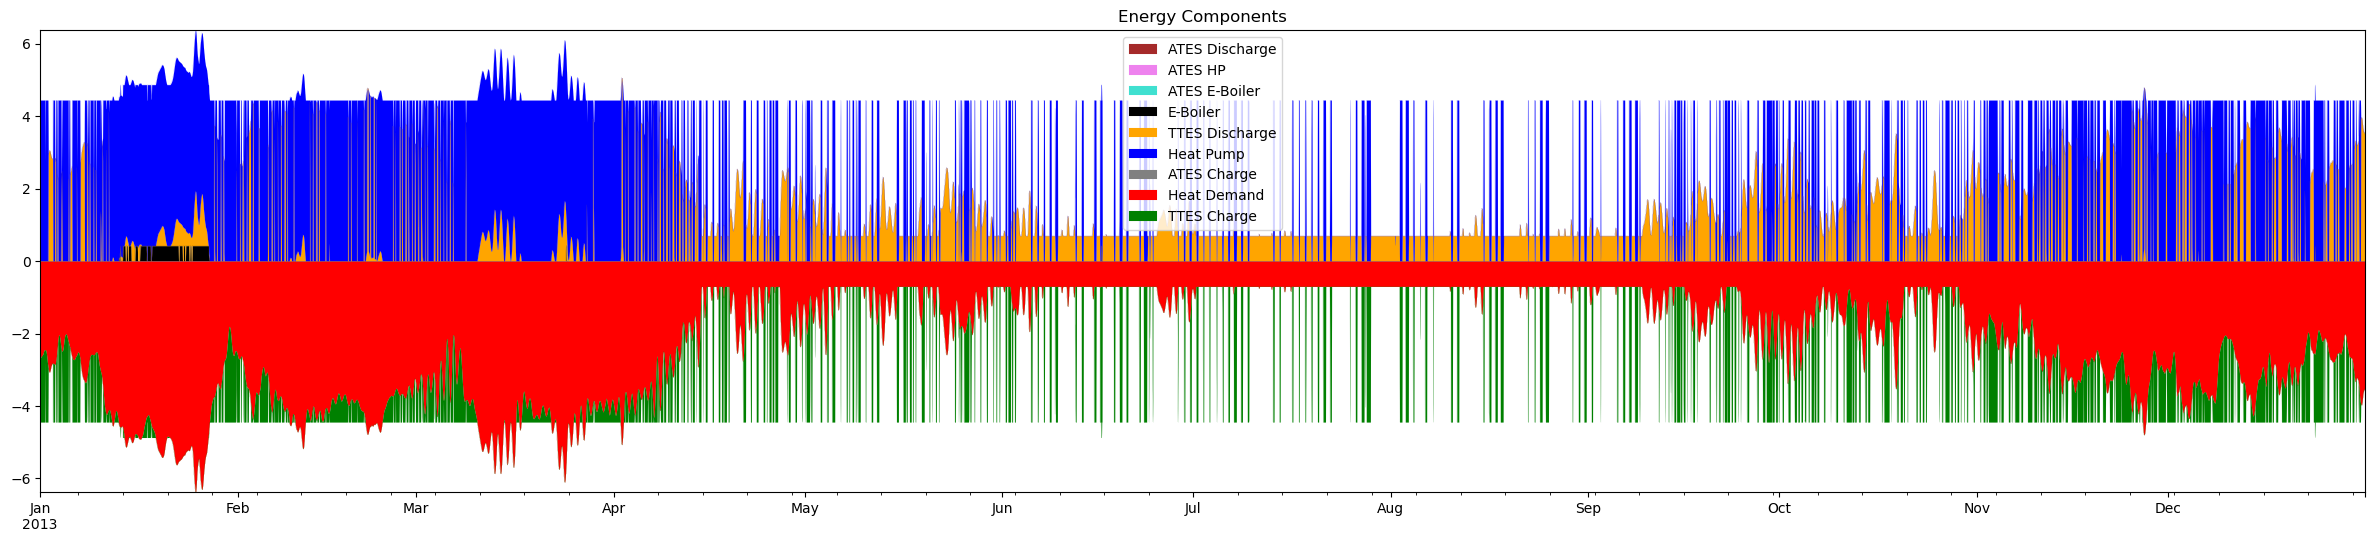

In [18]:
#NO ATES case

m_noATES, obj_sol_noATES = optimization(depth_ATES, ATES_max_power, time_index_H, temperature_heat, phi_standing, phi_pipes * phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price, drilling_costs=userinput.drilling_costs, capacity_ATES_max=0)
m_solution = pd.DataFrame({k: v.values for k, v in m_noATES.solution.data_vars.items()}, index=time_index_H)
m_dual = pd.DataFrame({k: v.values for k, v in m_noATES.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': df_results_I['phi_charge'].iloc[0],
    'phi_standing': df_results_I['phi_standing'].iloc[0],
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_noATES.items():
    system_info[k] = v
# Concatenate both DataFrames horizontally
df_result02 = pd.concat([heat_demand.rename('heat_demand'), m_solution, m_dual, system_info], axis=1)
df_result02.reset_index(inplace=True)
df_result02.rename(columns={'index': 'datetime'}, inplace=True)

# Create filename with short variable names and values
filename = f"{dir}/02_ATES_NoCap_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"

df_result02.to_csv(filename, index=False)

plot_results(m_noATES, time_index_H, heat_demand, electricity_price)

Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 58.77it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-ryk6mcjx.lp
Reading time = 0.78 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x3f1f49c5
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [9e-01, 7e+04]
  Bounds range     [6e+00, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 35041 rows and 8764 columns
Presolve time: 0.45s
Presolved: 96357 rows, 87602 columns, 271551 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.05s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 2.803e+05
 Factor NZ  : 1.371e+06 (roughly 90 MB of memory)


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 3.5 MW,
 ATES_capacity: 934.19 MWh, ATES_power: 6.01 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 0.97 MW,
 capacity_TTES: 53.23


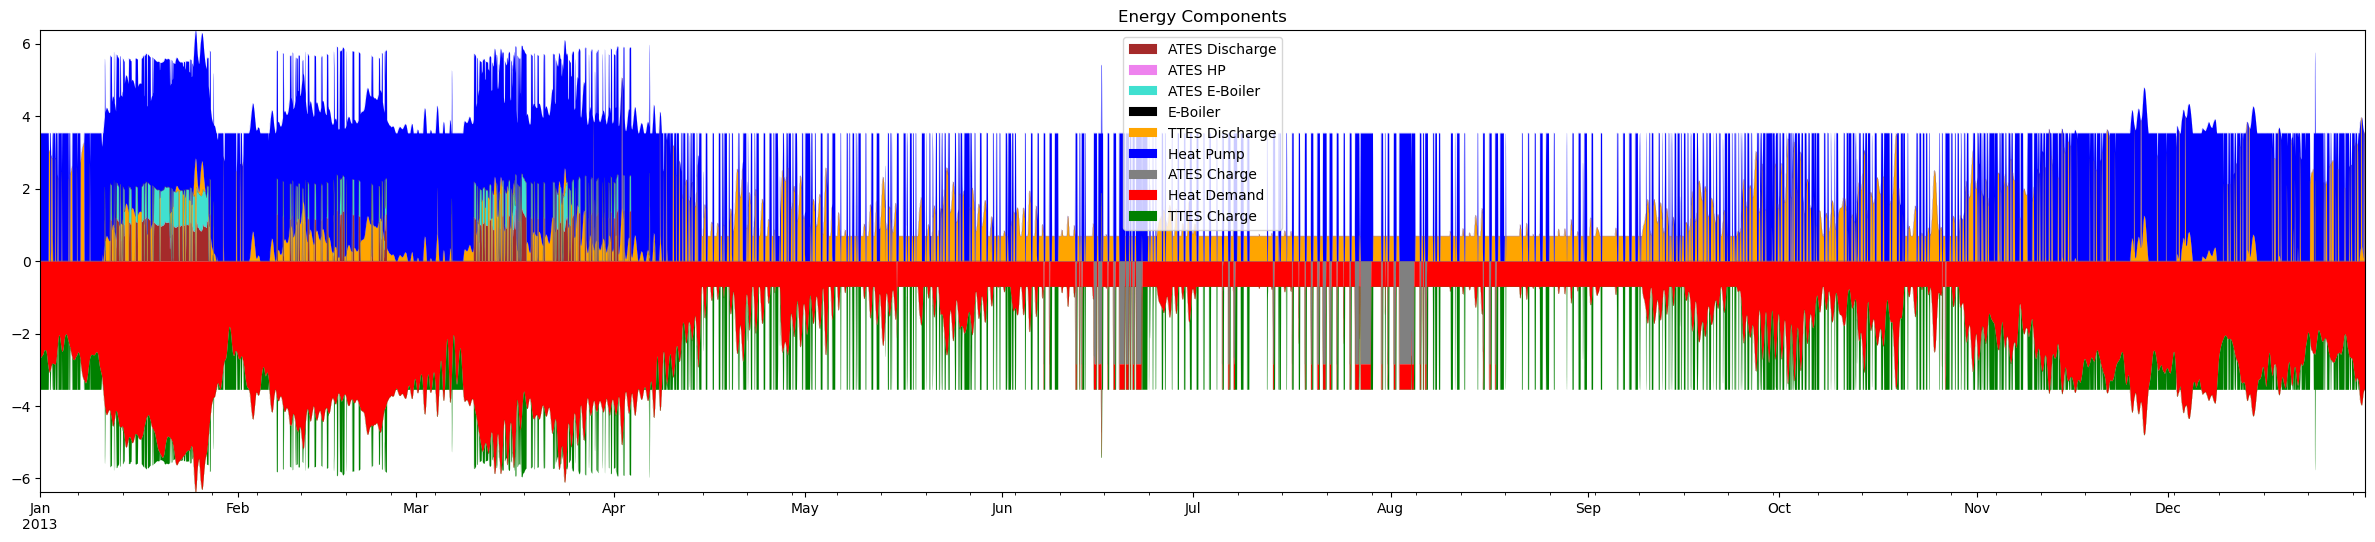

In [19]:
#Min Capacity case

m_setCap, obj_sol_setCap = optimization(depth_ATES, ATES_max_power, time_index_H, temperature_heat, phi_standing, phi_pipes * phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None, power_ATES_min=ATES_max_power)
m_solution = pd.DataFrame({k: v.values for k, v in m_setCap.solution.data_vars.items()}, index=time_index_H)
m_dual = pd.DataFrame({k: v.values for k, v in m_setCap.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': df_results_I['phi_charge'].iloc[0],
    'phi_standing': df_results_I['phi_standing'].iloc[0],
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_setCap.items():
    system_info[k] = v
# Concatenate both DataFrames horizontally
df_result03 = pd.concat([heat_demand.rename('heat_demand'), m_solution, m_dual, system_info], axis=1)

df_result03.reset_index(inplace=True)
df_result03.rename(columns={'index': 'datetime'}, inplace=True)

# Create filename with short variable names and values
filename = f"{dir}/03_ATES_SetCap_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result03.to_csv(filename, index=False)
plot_results(m_setCap, time_index_H, heat_demand, electricity_price)

Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 74.28it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-ujwweicn.lp
Reading time = 0.78 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0xbf8bdf73
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [9e-01, 7e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 6e+00]
Presolve removed 43799 rows and 26282 columns
Presolve time: 5.04s
Presolved: 87599 rows, 70084 columns, 236514 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.06s

Barrier statistics:
 Dense cols : 6
 AA' NZ     : 2.540e+05
 Factor NZ  : 1.130e+06 (roughly 70 MB of memory)

c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 3.6 MW,
 ATES_capacity: 980.45 MWh, ATES_power: 1.35 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 1.47 MW,
 capacity_TTES: 0.0


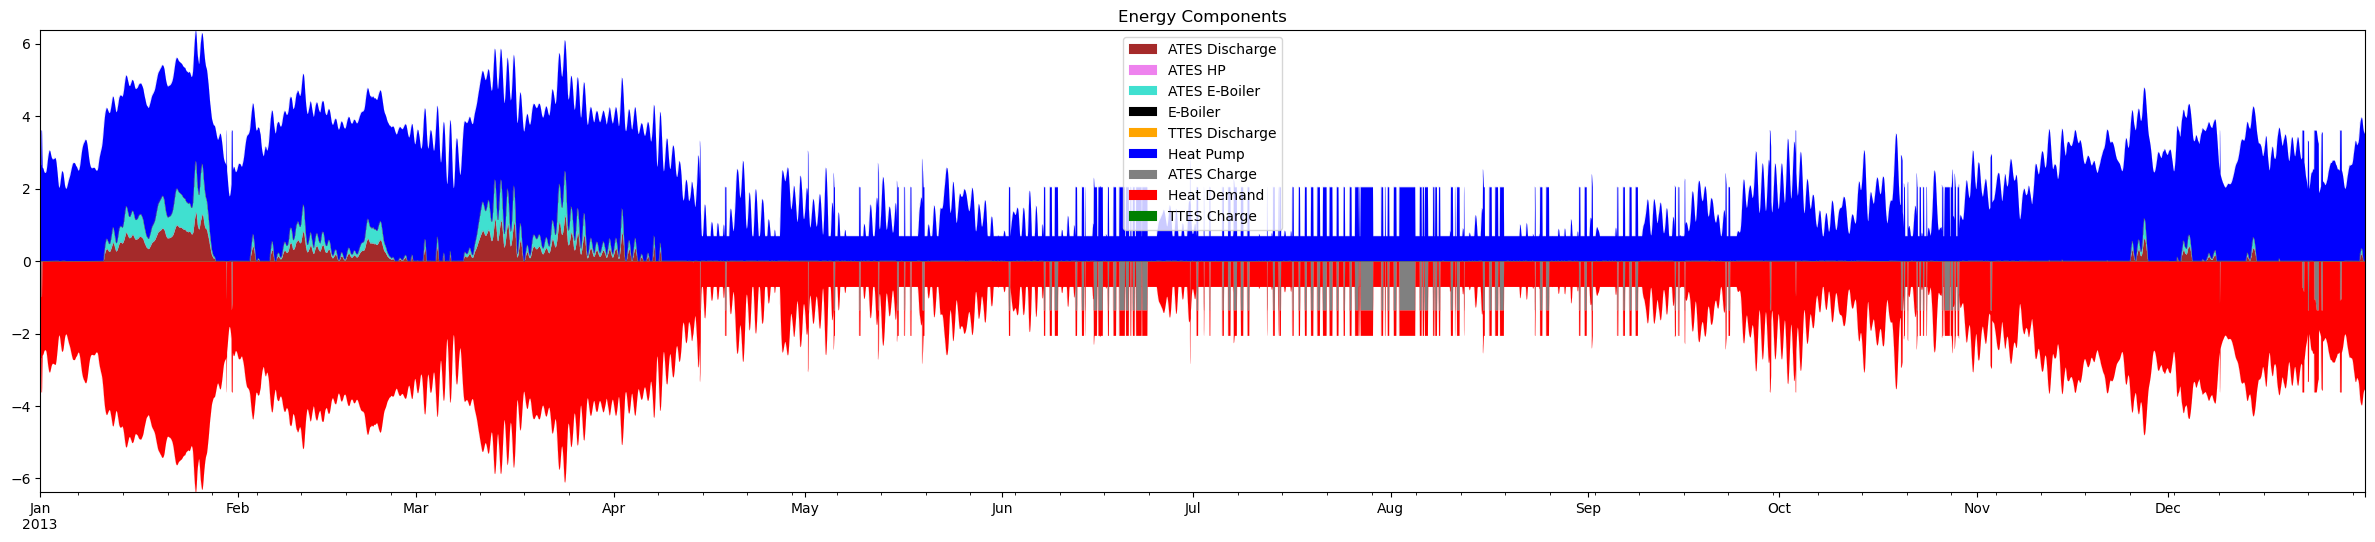

In [20]:
#no TTES  case

m_noTTES, obj_sol_noTTES = optimization(depth_ATES, ATES_max_power, time_index_H, temperature_heat, phi_standing * phi_pipes, phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None, power_TTES_max=0)
m_solution = pd.DataFrame({k: v.values for k, v in m_noTTES.solution.data_vars.items()}, index=time_index_H)
m_dual = pd.DataFrame({k: v.values for k, v in m_noTTES.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': df_results_I['phi_charge'].iloc[0],
    'phi_standing': df_results_I['phi_standing'].iloc[0],
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_noTTES.items():
    system_info[k] = v

df_result04 = pd.concat([heat_demand.rename('heat_demand'), m_solution, m_dual, system_info], axis=1)
df_result04.reset_index(inplace=True)
df_result04.rename(columns={'index': 'datetime'}, inplace=True)
# Create filename with short variable names and values
filename = f"{dir}/04_ATES_noTTES_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result04.to_csv(filename, index=False)
plot_results(m_noTTES, time_index_H, heat_demand, electricity_price)

Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 106.81it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-q7g43hkm.lp
Reading time = 0.45 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x3f6d8bc3
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [3e-03, 7e+04]
  Bounds range     [5e+01, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 35041 rows and 8764 columns
Presolve time: 0.28s
Presolved: 96357 rows, 87602 columns, 271551 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.03s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 2.803e+05
 Factor NZ  : 1.371e+06 (roughly 90 MB of memory)


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 16.6 MW, capacity_hp: 3.0 MW,
 ATES_capacity: 1670.88 MWh, ATES_power: 2.54 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 1.8 MW,
 capacity_TTES: 255.21


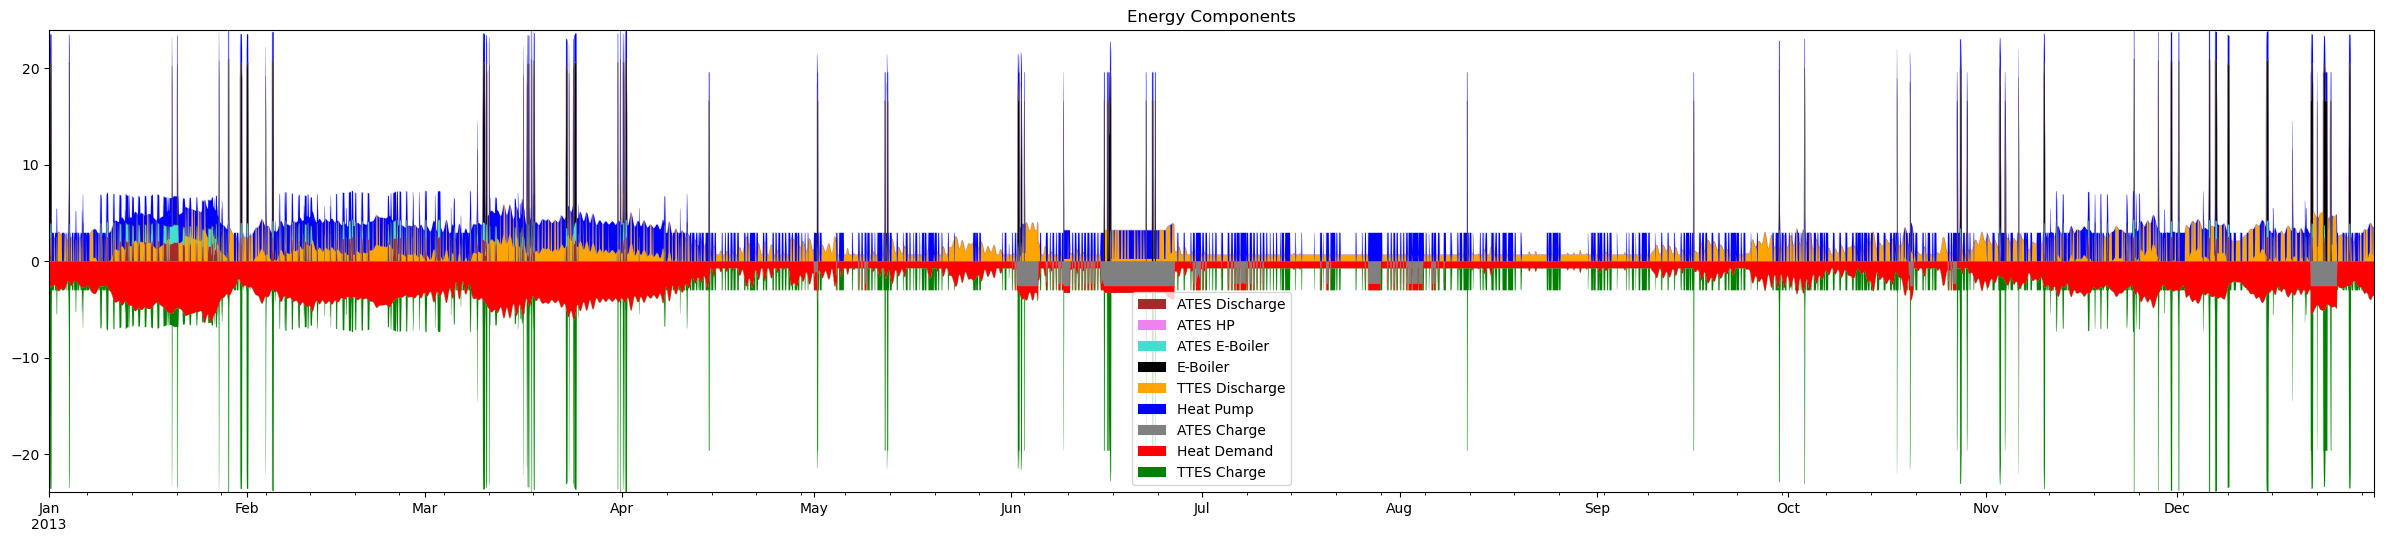

In [21]:
#alternative electricity price scenario

electricity_price_raw = electricity_price_raw#.clip(lower=0)


m_noTTES, obj_sol_noTTES = optimization(depth_ATES, ATES_max_power, time_index_H, temperature_heat, phi_standing * phi_pipes, phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price_raw, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None)
m_solution = pd.DataFrame({k: v.values for k, v in m_noTTES.solution.data_vars.items()}, index=time_index_H)
m_dual = pd.DataFrame({k: v.values for k, v in m_noTTES.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': df_results_I['phi_charge'].iloc[0],
    'phi_standing': df_results_I['phi_standing'].iloc[0],
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_noTTES.items():
    system_info[k] = v

df_result04 = pd.concat([heat_demand.rename('heat_demand'), m_solution, m_dual, system_info], axis=1)
df_result04.reset_index(inplace=True)
df_result04.rename(columns={'index': 'datetime'}, inplace=True)
# Create filename with short variable names and values
filename = f"{dir}/05_electricity_price_var_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result04.to_csv(filename, index=False)
plot_results(m_noTTES, time_index_H, heat_demand, electricity_price_raw)

Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 115.99it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-mdzguc05.lp
Reading time = 0.46 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x70819d01
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [6e-03, 7e+04]
  Bounds range     [5e+01, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 35041 rows and 8764 columns
Presolve time: 0.25s
Presolved: 96357 rows, 87602 columns, 271551 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.02s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 2.803e+05
 Factor NZ  : 1.371e+06 (roughly 90 MB of memory)


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 4.0 MW,
 ATES_capacity: 1499.75 MWh, ATES_power: 1.89 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 1.51 MW,
 capacity_TTES: 91.81


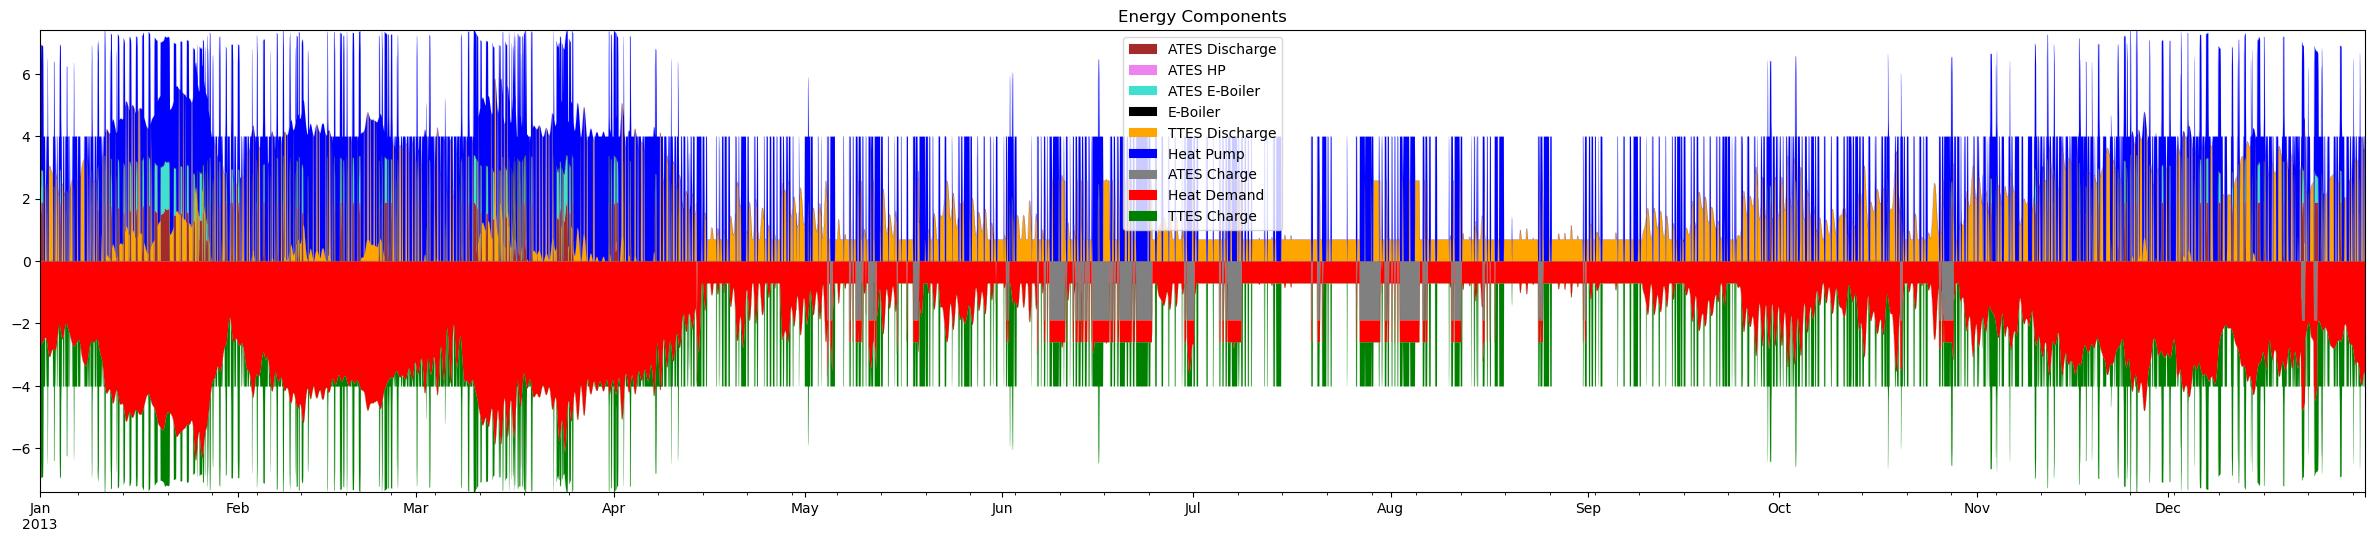

In [22]:
#alternative electricity price scenario II

electricity_price_raw = electricity_price_raw.clip(lower=0)


m_noTTES, obj_sol_noTTES = optimization(depth_ATES, ATES_max_power, time_index_H, temperature_heat, phi_standing * phi_pipes, phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price_raw, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None)
m_solution = pd.DataFrame({k: v.values for k, v in m_noTTES.solution.data_vars.items()}, index=time_index_H)
m_dual = pd.DataFrame({k: v.values for k, v in m_noTTES.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': df_results_I['phi_charge'].iloc[0],
    'phi_standing': df_results_I['phi_standing'].iloc[0],
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_noTTES.items():
    system_info[k] = v

df_result04 = pd.concat([heat_demand.rename('heat_demand'), m_solution, m_dual, system_info], axis=1)
df_result04.reset_index(inplace=True)
df_result04.rename(columns={'index': 'datetime'}, inplace=True)
# Create filename with short variable names and values
filename = f"{dir}/06_electricity_price_var_clipped_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result04.to_csv(filename, index=False)
plot_results(m_noTTES, time_index_H, heat_demand, electricity_price_raw)

hydr_cond:  3.529e-05 m/s
V_dot_max_ATES: 0.085 m3/s = 305.902 m3/h, ATES_max_power: 7 MW
r_hyd_max: 131.0 m, r_hyd_mid: 87.9 m, water_volume: 305901.6 m3
Pipe Requirements:
Number of wells per ATES : 1, volumeflow per pipe final: 0.085m3s, Pipe diameter: 450 mm, Pressure drop: 0.824 bar, Velocity: 0.534 m/s, alpha_in: 6595.4 W/m2K
System results:
dt:  0.001  K, Q_loss_pipes:  333.212  W, phi:  0.999952
ATES geometry:
Radii: r_hyd: 131.0 m, r_th: 90.5 m, r_hyd_mid: 87.9 m, water_volume per storage: 1618527.0 m3, surface medium velocity: 5.13e-06 m/s
Q loss ATES:
lambda_transmission: 2.71, lambda_convection: 30.28, added faktorterm: -830.3519499732533
Q ATES standing: -0.0 MW, Q loss charge: -0.0 MW
phi_standing: 1.00000071, dp_ATES: 2.84 bar, phi_charge_ATES: 1.00360468
power of pump: 0.037 MW


Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 36.18it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-xua4jj52.lp
Reading time = 0.86 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x0d0e6e09
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [7e-01, 7e+04]
  Bounds range     [5e+01, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 35041 rows and 8764 columns
Presolve time: 0.84s
Presolved: 96357 rows, 87602 columns, 271551 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.06s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 2.803e+05
 Factor NZ  : 1.371e+06 (roughly 90 MB of memory)


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 3.8 MW,
 ATES_capacity: 627.16 MWh, ATES_power: 0.65 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 0.65 MW,
 capacity_TTES: 71.54


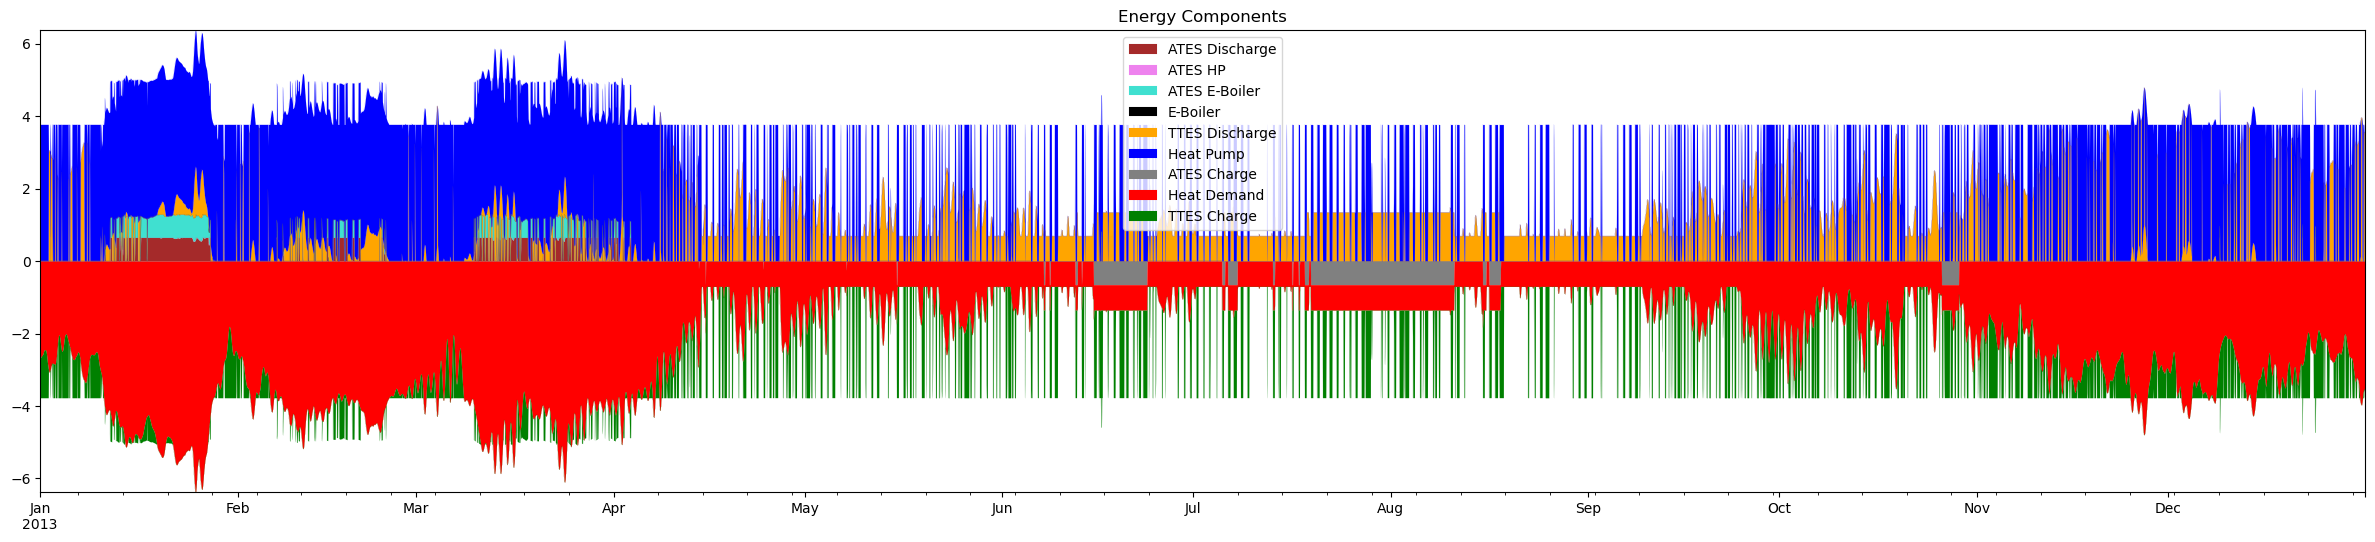

In [30]:
# 4 * depth scenario
temperature_ground_d, hydr_cond_d = calculate_ground_parameters(depth_ATES * 4, permeability)
ATES_max_power_d, phi_standing_d, phi_charge_ATES_d, phi_pipes_d, P_pump_d, Q_ATES_standing_mean_d, num_wells_pipes_d = ATES_complete_setup(hydr_cond_d, layer_thickness, porosity, depth_ATES * 4, temperature_ground_d, heat_capacity_solid, lambda_stand)


m_d, obj_sol_d = optimization(depth_ATES*4, ATES_max_power_d, time_index_H, temperature_heat, phi_standing_d * phi_pipes_d, phi_charge_ATES_d, heat_demand, P_pump_d, COP_hp, electricity_price, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None)
m_solution_d = pd.DataFrame({k: v.values for k, v in m_d.solution.data_vars.items()}, index=time_index_H)
m_dual_d = pd.DataFrame({k: v.values for k, v in m_d.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': phi_charge_ATES_d * phi_pipes_d,
    'phi_standing': phi_standing_d,
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_d.items():
    system_info[k] = v

df_result07 = pd.concat([heat_demand.rename('heat_demand'), m_solution_d, m_dual_d, system_info], axis=1)
df_result07.reset_index(inplace=True)
df_result07.rename(columns={'index': 'datetime'}, inplace=True)
# Create filename with short variable names and values
filename = f"{dir}/06_electricity_price_var_clipped_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result07.to_csv(filename, index=False)
plot_results(m_d, time_index_H, heat_demand, electricity_price)

In [32]:
temperature_ground_d

59.13297247999999

hydr_cond:  3.529e-05 m/s
V_dot_max_ATES: 0.085 m3/s = 305.902 m3/h, ATES_max_power: 7 MW
r_hyd_max: 131.0 m, r_hyd_mid: 87.9 m, water_volume: 305901.6 m3
Pipe Requirements:
Number of wells per ATES : 1, volumeflow per pipe final: 0.085m3s, Pipe diameter: 450 mm, Pressure drop: 0.824 bar, Velocity: 0.534 m/s, alpha_in: 6595.4 W/m2K
System results:
dt:  0.001  K, Q_loss_pipes:  333.212  W, phi:  0.999952
ATES geometry:
Radii: r_hyd: 131.0 m, r_th: 90.5 m, r_hyd_mid: 87.9 m, water_volume per storage: 1618527.0 m3, surface medium velocity: 5.13e-06 m/s
Q loss ATES:
lambda_transmission: 2.71, lambda_convection: 30.28, added faktorterm: -830.3519499732533
Q ATES standing: -0.0 MW, Q loss charge: -0.0 MW
phi_standing: 1.00000071, dp_ATES: 2.84 bar, phi_charge_ATES: 1.00360468
power of pump: 0.037 MW


Writing variables.: 100%|██████████| 16/16 [00:00<00:00, 37.32it/s]


Read LP format model from file C:\Users\greif\AppData\Local\Temp\linopy-problem-cgha5g1m.lp
Reading time = 0.75 seconds
obj: 131398 rows, 78847 columns, 332873 nonzeros
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 131398 rows, 78847 columns and 332873 nonzeros
Model fingerprint: 0x7da168b6
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [7e-01, 7e+04]
  Bounds range     [5e+01, 5e+01]
  RHS range        [1e-03, 6e+00]
Presolve removed 35041 rows and 8764 columns
Presolve time: 0.83s
Presolved: 96357 rows, 87602 columns, 271551 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.10s

Barrier statistics:
 Dense cols : 5
 AA' NZ     : 2.803e+05
 Factor NZ  : 1.371e+06 (roughly 90 MB of memory)


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 0.0 MW,
 ATES_capacity: 1546743.71 MWh, ATES_power: 3.63 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 3.0 MW,
 capacity_TTES: 79.33


c:\Users\greif\anaconda3\envs\esm-2023\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1598: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


Dimensions:
 capacity_eb: 0.0 MW, capacity_hp: 0.0 MW,
 ATES_capacity: 1546743.71 MWh, ATES_power: 3.63 MW,
 ATES_hp: 0.0 MW, ATES_eboiler: 3.0 MW,
 capacity_TTES: 79.33


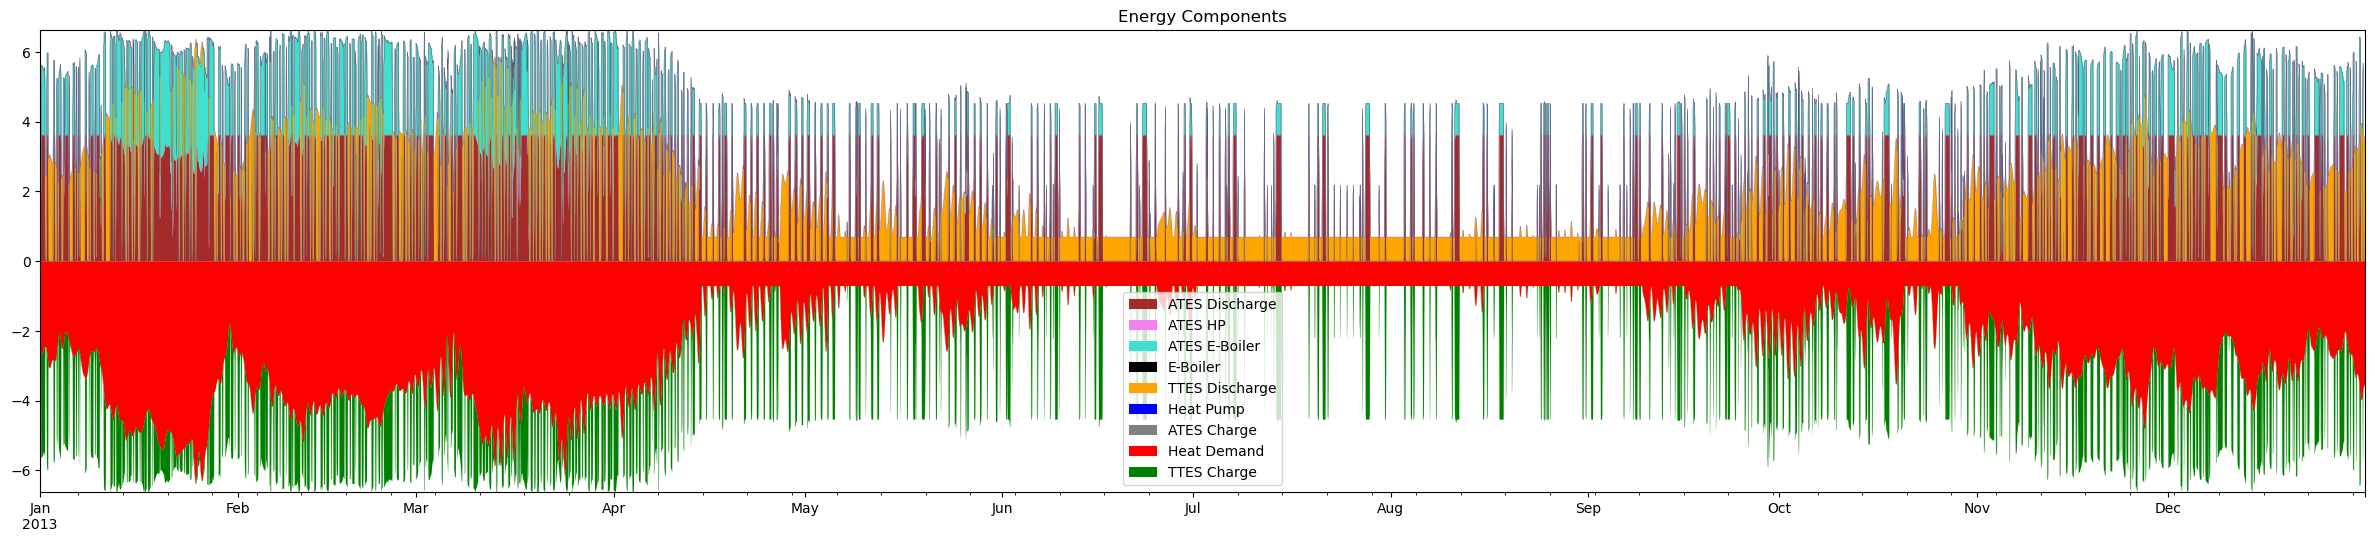

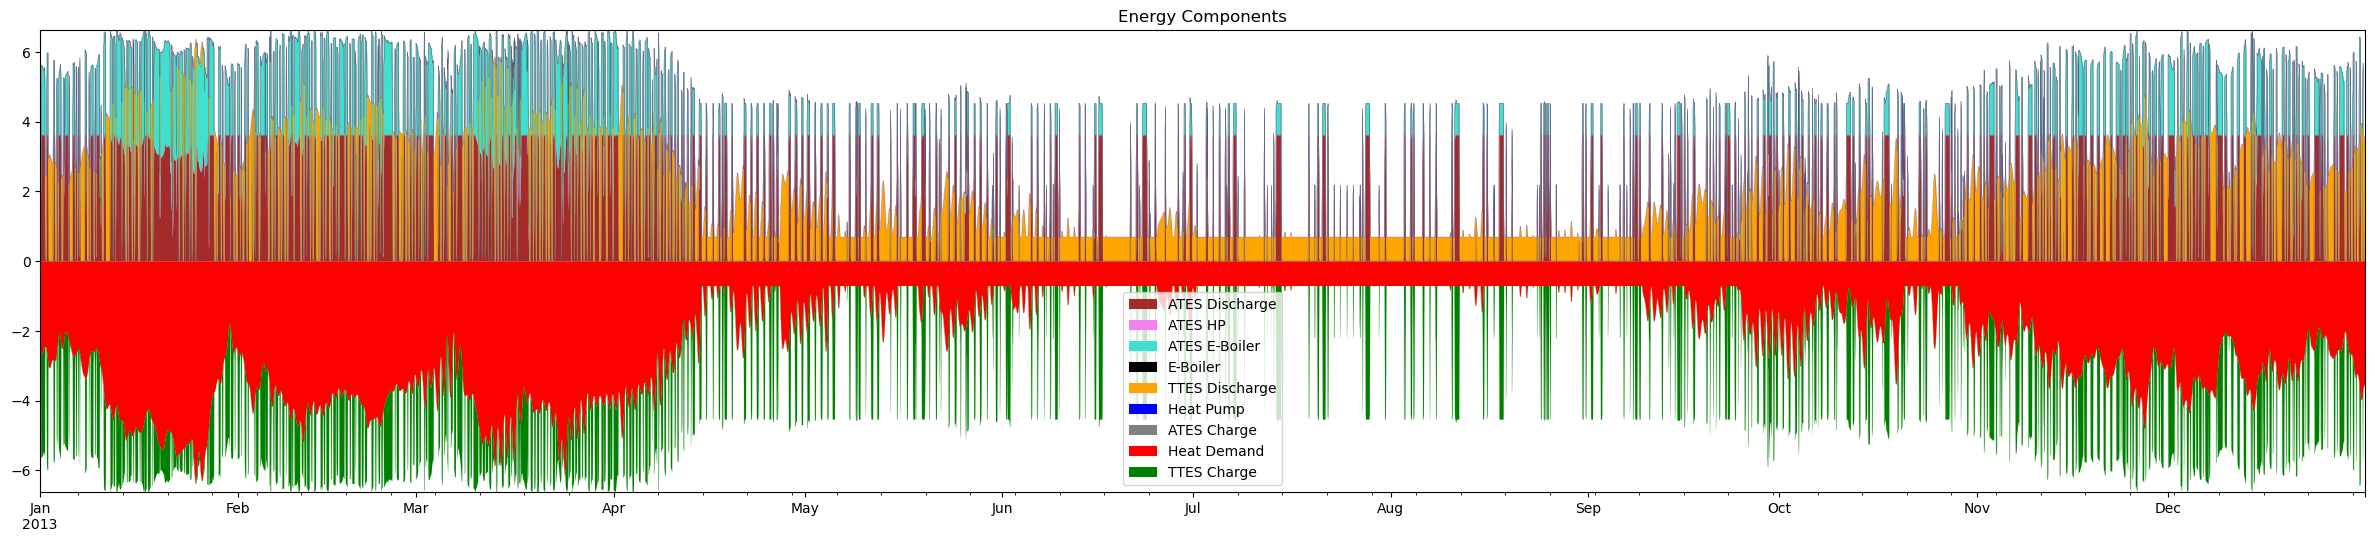

In [ ]:
temperature_ground_d, hydr_cond_d = calculate_ground_parameters(depth_ATES * 4, permeability)



ATES_max_power, phi_standing, phi_charge_ATES, phi_pipes, P_pump, Q_ATES_standing_mean, num_wells_pipes = ATES_complete_setup(hydr_cond_d, layer_thickness, porosity, depth_ATES * 4, temperature_ground_d, heat_capacity_solid, lambda_stand)
m_d, obj_sol_d = optimization(depth_ATES * 4, ATES_max_power, time_index_H, temperature_heat, phi_standing, phi_pipes * phi_charge_ATES, heat_demand, P_pump, COP_hp, electricity_price, drilling_costs=userinput.drilling_costs, capacity_ATES_max=None)

m_solution_d = pd.DataFrame({k: v.values for k, v in m_d.solution.data_vars.items()}, index=time_index_H)
m_dual_d = pd.DataFrame({k: v.values for k, v in m_d.dual.data_vars.items()}, index=time_index_H)
system_info = pd.DataFrame({
    'phi_charge': phi_charge_ATES_d * phi_pipes_d,
    'phi_standing': phi_standing_d,
    'heat_demand': heat_demand.values,
    'electricity_price': [1],
    'drilling_costs': [1000],
    'Capex_TTES': [3036.1],
}, index = time_index_H)  

for k, v in obj_sol_d.items():
    system_info[k] = v

df_result07 = pd.concat([heat_demand.rename('heat_demand'), m_solution_d, m_dual_d, system_info], axis=1)
df_result07.reset_index(inplace=True)
df_result07.rename(columns={'index': 'datetime'}, inplace=True)
# Create filename with short variable names and values
filename = f"{dir}/06_electricity_price_var_clipped_phi_c_{round(system_info.phi_charge.iloc[0],6)}_elp_{round(system_info.electricity_price.iloc[0],1):.1f}_drc_{round(userinput.drilling_costs,2):.1f}_CapTT_{round(userinput.Capex_TTES,2):.1f}.csv"
df_result07.to_csv(filename, index=False)
plot_results(m_d, time_index_H, heat_demand, electricity_price)

In [24]:
from ATES_table import ATES_examples
ATES_examples

Depth  Wells  Flow_m3_h  Capacity_MW  Flow_per_well_m3s     DN   
0    130.0      4      500.0         8.30           0.034722  500.0  \
1      NaN      7     1100.0        20.00           0.043651  100.0   
2      NaN      2      200.0         1.40           0.027778  100.0   
3    240.0      2        2.0          NaN           0.000278  200.0   
4     65.0      2      100.0         1.20           0.013889  300.0   
5    110.0     10        5.0          NaN           0.000139  200.0   
6      NaN      2       24.0          NaN           0.003333  100.0   
7    100.0     10      250.0         2.80           0.006944  300.0   
8      NaN     36     3000.0        20.00           0.023148  100.0   
9     60.0      2       45.0         0.33           0.006250  300.0   
10    70.0      8      400.0         2.90           0.013889  300.0   
11    75.0     10      120.0         1.30           0.003333  300.0   
12    90.0     11      180.0         1.30           0.004545  300.0   
13    67.0      2       90.0         0.60           0.012500  300.0   
14   100.0      2        NaN          NaN                NaN  100.0   
15  1200.0      2      100.0         3.30           0.013889  600.0   
16    60.0      6      272.0         2.00           0.012593  300.0   
17    45.0     18      200.0         7.00           0.003086  200.0   
18    20.0      2       15.0          NaN           0.002083  200.0   
19    50.0      5        NaN          NaN                NaN  100.0   
20   260.0      2      100.0         2.60           0.013889  500.0   
21   150.0      2       20.0         0.60           0.002778  300.0   

           dT   dP_real    U_value         Q_pipe       phi    P_Pump  
0   14.297277  4.691900  10.714286   87515.795350  0.086625  0.651653  
1   15.659668       NaN  10.714286            NaN       NaN       NaN  
2    6.028972       NaN  10.714286            NaN       NaN       NaN  
3         NaN  2.706866  10.714286   64627.048874       NaN  0.001504  
4   10.335381  7.240587  10.714286   26254.738605  0.043708  0.201127  
5         NaN  0.620323  10.714286   29620.730734       NaN  0.000862  
6         NaN       NaN  10.714286            NaN       NaN       NaN  
7    9.646356  5.569682  10.714286   40391.905546  0.064827  0.386783  
8    5.741878       NaN  10.714286            NaN       NaN       NaN  
9    6.316066  3.007628  10.714286   24235.143328  0.013434  0.037595  
10   6.244293  7.797555  10.714286   28274.333882  0.093025  0.866395  
11   9.330552  2.005086  10.714286   30293.929160  0.041147  0.066836  
12   6.220368  3.281049  10.714286   36352.714992  0.034526  0.164052  
13   5.741878  6.717037  10.714286   27062.576716  0.021690  0.167926  
14        NaN       NaN  10.714286   13463.968515       NaN       NaN  
15  28.422298  8.354524  10.714286  969405.733108  0.003393  0.232070  
16   6.332954  6.059814  10.714286   24235.143328  0.076234  0.457853  
17  30.144861  5.639303  10.714286   12117.571664  0.366155  0.313295  
18        NaN  1.691791  10.714286    5385.587406       NaN  0.007049  
19        NaN       NaN  10.714286    6731.984258       NaN       NaN  
20  22.393326  3.753520  10.714286  175031.590700  0.014637  0.104264  
21  25.838453  3.341809  10.714286   60587.858319  0.009806  0.018566